**set manually configurations input values below:**

In [1]:
# set manually the reference value of the NVDA stock below:
ref_val = 6241.04

# select if to analyze stocks or crypto
stocks_selected = True

In [2]:
import os
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
from eodhd import APIClient

from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import CLA

******************
Top Traded
*******************

In [3]:
# import subprocess

# # Replace 'YOUR_VARIABLE_NAME' and 'your_key_value' with your variable name and value
# subprocess.run(['setx', 'AV_API_KEY', 'xxxxxx'])

In [4]:
def get_top_gainers_losers():
    api_key = os.getenv('AV_API_KEY')
    url = 'https://www.alphavantage.co/query?function=TOP_GAINERS_LOSERS&apikey={api_key}'
    response = requests.get(url)
    return response.json()

top_change = get_top_gainers_losers()

In [5]:
top_change.keys()

dict_keys(['metadata', 'last_updated', 'top_gainers', 'top_losers', 'most_actively_traded'])

In [6]:
top_gainers = pd.DataFrame(top_change['top_gainers']).set_index('ticker')
top_gainers['price'] = pd.to_numeric(top_gainers['price'])
top_gainers['change_amount'] = pd.to_numeric(top_gainers['change_amount'])
top_gainers['change_percentage'] = top_gainers['change_percentage'].str.rstrip('%').astype('float')
top_gainers['volume'] = pd.to_numeric(top_gainers['volume'])
top_gainers.sort_values('change_percentage', ascending=False, inplace=True)

top_gainers

,price,change_amount,change_percentage,volume
ticker,,,,
QVCGB,9.74000000,7.74000000,387.00000000,3117926
SBFMW,0.80000000,0.58000000,263.63640000,728580
STEC,1.63000000,1.00200000,159.55410000,121322284
SXTC,0.84000000,0.49790000,145.54220000,22384938
ATCH,5.55000000,3.20000000,136.17020000,145584403
IINNW,0.47000000,0.26760000,132.21340000,395323
NTRBW,3.60000000,1.96000000,119.51220000,13712
YYAI,1.27000000,0.62990000,98.40650000,150381553
GB+,0.02380000,0.01180000,98.33330000,190147


In [7]:
top_losers = pd.DataFrame(top_change['top_losers']).set_index('ticker')
top_losers['price'] = pd.to_numeric(top_losers['price'])
top_losers['change_amount'] = pd.to_numeric(top_losers['change_amount'])
top_losers['change_percentage'] = top_losers['change_percentage'].str.rstrip('%').astype('float')
top_losers['volume'] = pd.to_numeric(top_losers['volume'])
top_losers.sort_values('change_percentage', inplace=True)

top_losers

,price,change_amount,change_percentage,volume
ticker,,,,
GGROW,0.02000000,-0.01990000,-49.87470000,8857
CEADW,0.01430000,-0.01280000,-47.23250000,7058
TH,5.05000000,-4.31000000,-46.04700000,13029254
WINVW,0.01560000,-0.01210000,-43.68230000,32155
AUUDW,0.02280000,-0.01730000,-43.14210000,55011
SXTPW,0.02410000,-0.01790000,-42.61900000,32105
AEON,0.07530000,-0.04500000,-37.40650000,13138029
STAI,2.15000000,-1.14000000,-34.65050000,5007763
BTBDW,0.03000000,-0.01590000,-34.64050000,14400


In [8]:
top_traded = pd.DataFrame(top_change['most_actively_traded']).set_index('ticker')
top_traded['price'] = pd.to_numeric(top_traded['price'])
top_traded['change_amount'] = pd.to_numeric(top_traded['change_amount'])
top_traded['change_percentage'] = top_traded['change_percentage'].str.rstrip('%').astype('float')
top_traded['volume'] = pd.to_numeric(top_traded['volume'])
top_traded.sort_values('change_percentage', ascending=False, inplace=True)

top_traded

,price,change_amount,change_percentage,volume
ticker,,,,
STEC,1.63000000,1.00200000,159.55410000,121322284
ATCH,5.55000000,3.20000000,136.17020000,145584403
YYAI,1.27000000,0.62990000,98.40650000,150381553
PEPG,2.29000000,0.92000000,67.15330000,108956523
DGLY,0.09360000,0.01110000,13.45450000,97747443
WNW,0.20300000,0.01800000,9.72970000,79679299
TSLZ,3.28500000,0.13000000,4.12040000,77125139
NU,11.01500000,0.19500000,1.80220000,94926927
SPXS,6.01000000,0.08000000,1.34910000,83421241


************************
Tickers Lists
***********************

In [9]:
api_key = os.getenv('EODHD_API_KEY')
api = APIClient(api_key)

In [10]:
l_e = api.get_list_of_exchanges()
list_exchanges = pd.DataFrame(l_e)
# list_exchanges[list_exchanges.Country=='Germany']

In [11]:
EXCHANGES = ['US','HK','MC','CC','F']

def fetch_stock_symbols(exchange_code):
    url = f'https://eodhistoricaldata.com/api/exchange-symbol-list/{exchange_code}?api_token={api_key}&fmt=json'
    response = requests.get(url)
    data = response.json()
    return [item['Code'] for item in data]

stock_tickers_by_exchange = {}

for exchange_code in EXCHANGES:
    symbols = fetch_stock_symbols(exchange_code)
    stock_tickers_by_exchange[exchange_code] = symbols


In [12]:
# Print the number of symbols retrieved for each exchange
for exchange, tickers in stock_tickers_by_exchange.items():
    print(f"Exchange: {exchange}, Number of symbols: {len(tickers)}")

Exchange: US, Number of symbols: 50377
Exchange: HK, Number of symbols: 3694
Exchange: MC, Number of symbols: 280
Exchange: CC, Number of symbols: 2492
Exchange: F, Number of symbols: 10811


****************************************
Portfolio Analysis
***************************************

In [13]:
# # Read the specified sheet into a DataFrame
# pf = pd.read_csv('alfrizz_portfolio.csv')
# pf['merged'] = pf['parentUsername'].fillna(pf['ticker'])
# pf

In [14]:
# pf.investmentPct.sum()

In [15]:
# merged_sorted = pf.groupby('merged')['investmentPct'].sum().sort_values(ascending=False)
# merged_sorted

In [16]:
pf = pd.read_excel('alfrizz_portfolio.xlsx')
pf['merged'] = pf['parentUsername'].fillna(pf['ticker'])
pf.sort_values('investmentPctRealized', ascending=False)
pf.valuePctUnrealized.sum()


99.833401

In [17]:
# calculate total through a reference stock (NVDA), set at the beginning
ref_pct = pf[pf.ticker=='NVDA'].valuePctUnrealized.values[0]
tot_pf = round(ref_val/ref_pct*100)
tot_pf

164525

In [18]:
pf['position'] = round(tot_pf*pf['valuePctUnrealized']/100).astype(int)
pf.sort_values('position', inplace = True, ascending=False)
pf

,instrumentId,isBuy,investmentPctRealized,profitPct,valuePctUnrealized,ticker,parentUsername,merged,position
36,100000.00000000,1.00000000,3.74828400,77.55342600,6.18704900,BTC,NaN,BTC,10179
48,NaN,NaN,5.85160600,9.78596900,5.80497700,NaN,AI-Revolution,AI-Revolution,9551
37,1155.00000000,1.00000000,3.90118900,37.49641600,4.98666800,BABA,NaN,BABA,8204
49,NaN,NaN,6.24869200,-20.53150000,4.61642900,NaN,CryptoPortfolio,CryptoPortfolio,7595
2,2380.00000000,1.00000000,3.53159800,38.03766600,4.53201100,01211.HK,NaN,01211.HK,7456
16,1180.00000000,1.00000000,3.40661200,24.00783600,3.92729800,1810.HK,NaN,1810.HK,6461
7,1137.00000000,1.00000000,4.24364300,-3.84686200,3.79336200,NVDA,NaN,NVDA,6241
13,2339.00000000,1.00000000,3.15677700,16.27308500,3.41228300,0700.HK,NaN,0700.HK,5614
8,1001.00000000,1.00000000,3.18219600,7.57160400,3.18234000,AAPL,NaN,AAPL,5236
14,6700.00000000,1.00000000,2.58700800,30.67670200,3.14280900,XPEV,NaN,XPEV,5171


In [19]:
pf.loc[pf.merged=='BTC','merged'] = 'BTC-USD.CC'
pf.loc[pf.merged=='ETH','merged'] = 'ETH-USD.CC'
pf.loc[pf.merged=='XRP','merged'] = 'XRP-USD.CC'
pf.loc[pf.merged=='SOL','merged'] = 'SOL-USD.CC'
pf.loc[pf.merged=='ADA','merged'] = 'ADA-USD.CC'
pf.loc[pf.merged=='01211.HK','merged'] = '1211.HK'
pf.loc[pf.merged=='VOW3.DE','merged'] = 'VOW3.F'
pf

,instrumentId,isBuy,investmentPctRealized,profitPct,valuePctUnrealized,ticker,parentUsername,merged,position
36,100000.00000000,1.00000000,3.74828400,77.55342600,6.18704900,BTC,NaN,BTC-USD.CC,10179
48,NaN,NaN,5.85160600,9.78596900,5.80497700,NaN,AI-Revolution,AI-Revolution,9551
37,1155.00000000,1.00000000,3.90118900,37.49641600,4.98666800,BABA,NaN,BABA,8204
49,NaN,NaN,6.24869200,-20.53150000,4.61642900,NaN,CryptoPortfolio,CryptoPortfolio,7595
2,2380.00000000,1.00000000,3.53159800,38.03766600,4.53201100,01211.HK,NaN,1211.HK,7456
16,1180.00000000,1.00000000,3.40661200,24.00783600,3.92729800,1810.HK,NaN,1810.HK,6461
7,1137.00000000,1.00000000,4.24364300,-3.84686200,3.79336200,NVDA,NaN,NVDA,6241
13,2339.00000000,1.00000000,3.15677700,16.27308500,3.41228300,0700.HK,NaN,0700.HK,5614
8,1001.00000000,1.00000000,3.18219600,7.57160400,3.18234000,AAPL,NaN,AAPL,5236
14,6700.00000000,1.00000000,2.58700800,30.67670200,3.14280900,XPEV,NaN,XPEV,5171


In [20]:
weights_dict = {pf.merged.iloc[i]:round(pf.iloc[i].valuePctUnrealized,3) for i in range(len(pf)) }
weights_dict

{'BTC-USD.CC': 6.187,
 'AI-Revolution': 5.805,
 'BABA': 4.987,
 'CryptoPortfolio': 4.616,
 '1211.HK': 4.532,
 '1810.HK': 3.927,
 'NVDA': 3.793,
 '0700.HK': 3.412,
 'AAPL': 3.182,
 'XPEV': 3.143,
 'LI': 2.536,
 'NFLX': 2.421,
 'VST': 2.418,
 'GOOGL': 2.359,
 'KO': 2.359,
 'LIN': 2.345,
 'MSFT': 2.309,
 'T': 2.237,
 'VUG': 2.211,
 'QQQ': 2.102,
 'GOLD': 1.986,
 'TSLA': 1.972,
 'ETH-USD.CC': 1.95,
 'VGT': 1.942,
 'META': 1.895,
 'AMZN': 1.659,
 'NXPI': 1.512,
 'SMH': 1.339,
 'SAN': 1.283,
 'UCG.MI': 1.272,
 'JNJ': 1.213,
 'PG': 1.211,
 'VOW3.F': 1.163,
 'BIDU': 1.127,
 'NIO': 1.074,
 'SE': 1.069,
 'SO': 0.914,
 'PLTR': 0.868,
 'DASH.US': 0.85,
 'AMD': 0.837,
 'SPOT': 0.821,
 'ABNB': 0.787,
 'APP': 0.649,
 'WMT': 0.611,
 'ADA-USD.CC': 0.59,
 'SOL-USD.CC': 0.567,
 'XRP-USD.CC': 0.558,
 'SMR': 0.543,
 'HD': 0.416,
 'CCJ': 0.272}

In [21]:
# us_tickers = [ticker for ticker in pf.ticker if ticker in stock_tickers_by_exchange['US']]
# us_tickers

In [22]:
# search_string = '1211'
# [ticker for ticker in stock_tickers_by_exchange['HK'] if search_string in ticker]

# search_string = 'ETH'
# [ticker for ticker in stock_tickers_by_exchange['CC'] if search_string in ticker]

# search_string = 'VOW3'
# [ticker for ticker in stock_tickers_by_exchange['F'] if search_string in ticker]

# search_string

In [23]:
my_tickers = pf.merged.values.tolist()

my_tickers.remove('CryptoPortfolio')
my_tickers.remove('AI-Revolution')
my_tickers.remove('UCG.MI')
len(my_tickers)

47

In [24]:
# one year trading days

today = datetime.today().date()
today_date = today.strftime('%Y-%m-%d')

# yesterday = today - timedelta(days=1)
# yesterday_date = yesterday.strftime('%Y-%m-%d')

past = today - timedelta(days=366)
past_date = past.strftime('%Y-%m-%d')

In [25]:
def get_ticker_data(ticker):
    data = api.get_eod_historical_stock_market_data(symbol = ticker, period='d', from_date = past_date, to_date = today_date, order='a')
    return pd.DataFrame(data)

In [26]:
tickers = my_tickers

all_data = []

for ticker in tickers:
    df = get_ticker_data(ticker)
    df['ticker'] = ticker
    all_data.append(df)

In [27]:
# Concatenate all dataframes
combined_df = pd.concat(all_data)

pd.set_option('display.max_columns', None)

# Pivot the dataframe to get dates and adjusted closes for all tickers
portfolio_df = combined_df.pivot(index='date', columns='ticker', values='adjusted_close')
portfolio_df

ticker,0700.HK,1211.HK,1810.HK,AAPL,ABNB,ADA-USD.CC,AMD,AMZN,APP,BABA,BIDU,BTC-USD.CC,CCJ,DASH.US,ETH-USD.CC,GOLD,GOOGL,HD,JNJ,KO,LI,LIN,META,MSFT,NFLX,NIO,NVDA,NXPI,PG,PLTR,QQQ,SAN,SE,SMH,SMR,SO,SOL-USD.CC,SPOT,T,TSLA,VGT,VOW3.F,VST,VUG,WMT,XPEV,XRP-USD.CC
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-02-25,NaN,NaN,NaN,NaN,NaN,0.59137871,NaN,NaN,NaN,NaN,NaN,51733.23830000,NaN,NaN,3112.69735299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.45349255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.54242474
2024-02-26,284.74040000,185.09790000,13.10000000,180.30860000,149.27000000,0.61973615,176.01000000,174.73000000,58.99000000,75.86290000,110.59000000,54522.40230000,40.79050000,119.89000000,3178.99369361,14.31090000,137.07310000,362.71580000,155.79210000,58.91080000,41.34000000,439.57860000,480.41600000,404.45220000,587.65000000,5.65000000,79.07540000,240.81210000,156.36200000,23.56000000,433.97150000,3.91560000,45.36000000,209.42180000,2.73000000,64.03160000,109.91852982,254.99000000,15.68500000,199.40000000,511.20350000,113.65100000,48.26310000,336.22590000,58.89410000,9.22000000,0.55140469
2024-02-27,282.16260000,194.94880000,13.48000000,181.77170000,152.06000000,0.62421589,178.00000000,173.54000000,60.63000000,77.02300000,112.36000000,57085.37110000,41.54900000,123.70000000,3244.51924650,14.17410000,138.37840000,366.58110000,155.97620000,58.55170000,46.21000000,439.44030000,485.71140000,404.39260000,601.67000000,5.78000000,78.68450000,242.72840000,155.46410000,24.53000000,435.01530000,3.92520000,46.73000000,208.81450000,3.12000000,64.23460000,108.38808682,253.02000000,15.90230000,199.73000000,511.94870000,113.69800000,50.47080000,336.80300000,58.88420000,9.38000000,0.58625815
2024-02-28,274.62770000,190.02330000,13.08000000,180.56740000,153.43000000,0.63105890,176.54000000,173.16000000,58.01000000,73.95920000,103.31000000,62504.78910000,40.68070000,122.44000000,3385.70396974,14.09550000,135.88740000,368.58210000,156.52840000,58.61000000,45.29000000,445.76320000,482.68970000,404.63080000,596.48000000,5.43000000,77.64670000,240.99980000,156.19610000,24.42000000,432.69900000,3.95390000,47.75000000,206.49480000,3.20000000,64.57290000,118.05219721,252.25000000,16.02510000,202.04000000,509.57410000,116.61300000,52.49040000,335.83790000,58.91390000,8.73000000,0.57581072
2024-02-29,274.82600000,190.41740000,13.22000000,179.90050000,157.47000000,0.65564583,192.53000000,176.76000000,59.72000000,73.40390000,101.33000000,61198.38280000,40.45120000,124.57000000,3341.91960335,14.42010000,137.95990000,371.51040000,156.36370000,58.24120000,45.88000000,443.41190000,488.78290000,410.50590000,602.92000000,5.75000000,79.09540000,246.67950000,155.11280000,25.08000000,436.40700000,3.93470000,48.52000000,211.01470000,3.10000000,64.99810000,125.71151613,256.41000000,15.99680000,201.88000000,514.45240000,116.07100000,53.99520000,338.32540000,57.91580000,9.43000000,0.58632472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-20,486.80000000,375.00000000,49.15000000,245.83000000,155.31000000,0.80447441,114.17000000,222.88000000,450.01000000,135.97000000,89.65000000,98333.93782934,46.54000000,202.25000000,2740.38654291,18.82000000,184.56000000,394.64000000,159.68000000,70.04000000,26.37000000,461.90000000,694.84000000,416.13000000,1024.54000000,4.37000000,140.11000000,245.86000000,167.21000000,106.27000000,537.23000000,6.03000000,132.83000000,257.80000000,20.78000000,87.82000000,176.04889127,636.77000000,26.15000000,354.40000000,641.51000000,97.20700000,163.18000000,425.43000000,97.21000000,17.70000000,2.69082787
2025-02-21,517.00000000,392.40000000,51.70000000,245.55000000,146.07000000,0.76137139,110.84000000,216.58000000,415.31000000,143.75000000,91.28000000,96125.54405496,43.48000000,199.94000000,2659.65552668,18.30000000,179.66000000,385.30000000,162.3000000

In [28]:
# normalized stocks values (by first non null row)
portfolio_df_norm = portfolio_df/portfolio_df.dropna().iloc[0]

# best performing tickers in the last year
best_perf_tickers = portfolio_df_norm.dropna().iloc[-1].sort_values(ascending=False)[:10].index
best_perf_tickers

Index(['APP', 'SMR', 'XRP-USD.CC', '1810.HK', 'PLTR', 'VST', 'SE', 'SPOT',
       '1211.HK', 'XPEV'],
      dtype='object', name='ticker')

<Axes: xlabel='date'>

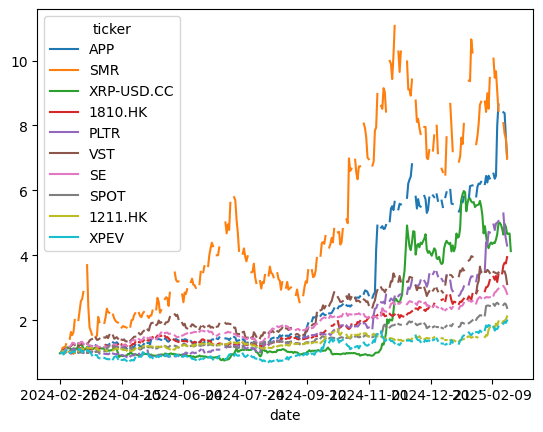

In [29]:
# plot best performing tickers 
portfolio_df_norm[best_perf_tickers].plot()

In [30]:
# worst performing tickers in the last year
worst_perf_tickers = portfolio_df_norm.dropna().iloc[-1].sort_values(ascending=True)[:5].index
worst_perf_tickers

Index(['AMD', 'LI', 'NIO', 'ETH-USD.CC', 'BIDU'], dtype='object', name='ticker')

<Axes: xlabel='date'>

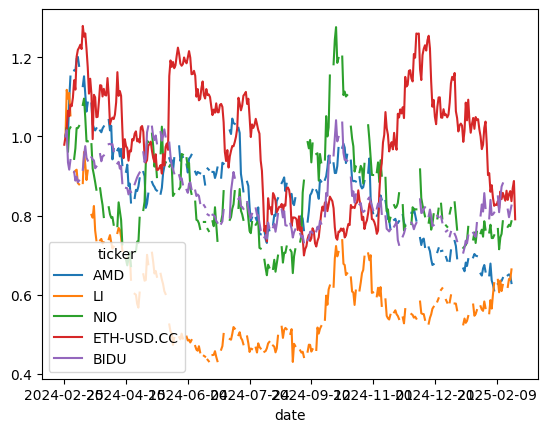

In [31]:
# plot worst performing tickers 
portfolio_df_norm[worst_perf_tickers].plot()

Calculate portfolio variance only for the crypto

In [32]:
cryptos = ['ADA-USD.CC','BTC-USD.CC','ETH-USD.CC','SOL-USD.CC','XRP-USD.CC']

if stocks_selected == True: # analysis on stocks
    portfolio_df = portfolio_df.drop(['ADA-USD.CC','BTC-USD.CC','ETH-USD.CC','SOL-USD.CC','XRP-USD.CC'], axis=1).dropna()
else: # analysis on cryptos
    portfolio_df = portfolio_df[['ADA-USD.CC','BTC-USD.CC','ETH-USD.CC','SOL-USD.CC','XRP-USD.CC']]

portfolio_df

ticker,0700.HK,1211.HK,1810.HK,AAPL,ABNB,AMD,AMZN,APP,BABA,BIDU,CCJ,DASH.US,GOLD,GOOGL,HD,JNJ,KO,LI,LIN,META,MSFT,NFLX,NIO,NVDA,NXPI,PG,PLTR,QQQ,SAN,SE,SMH,SMR,SO,SPOT,T,TSLA,VGT,VOW3.F,VST,VUG,WMT,XPEV
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-02-26,284.74040000,185.09790000,13.10000000,180.30860000,149.27000000,176.01000000,174.73000000,58.99000000,75.86290000,110.59000000,40.79050000,119.89000000,14.31090000,137.07310000,362.71580000,155.79210000,58.91080000,41.34000000,439.57860000,480.41600000,404.45220000,587.65000000,5.65000000,79.07540000,240.81210000,156.36200000,23.56000000,433.97150000,3.91560000,45.36000000,209.42180000,2.73000000,64.03160000,254.99000000,15.68500000,199.40000000,511.20350000,113.65100000,48.26310000,336.22590000,58.89410000,9.22000000
2024-02-27,282.16260000,194.94880000,13.48000000,181.77170000,152.06000000,178.00000000,173.54000000,60.63000000,77.02300000,112.36000000,41.54900000,123.70000000,14.17410000,138.37840000,366.58110000,155.97620000,58.55170000,46.21000000,439.44030000,485.71140000,404.39260000,601.67000000,5.78000000,78.68450000,242.72840000,155.46410000,24.53000000,435.01530000,3.92520000,46.73000000,208.81450000,3.12000000,64.23460000,253.02000000,15.90230000,199.73000000,511.94870000,113.69800000,50.47080000,336.80300000,58.88420000,9.38000000
2024-02-28,274.62770000,190.02330000,13.08000000,180.56740000,153.43000000,176.54000000,173.16000000,58.01000000,73.95920000,103.31000000,40.68070000,122.44000000,14.09550000,135.88740000,368.58210000,156.52840000,58.61000000,45.29000000,445.76320000,482.68970000,404.63080000,596.48000000,5.43000000,77.64670000,240.99980000,156.19610000,24.42000000,432.69900000,3.95390000,47.75000000,206.49480000,3.20000000,64.57290000,252.25000000,16.02510000,202.04000000,509.57410000,116.61300000,52.49040000,335.83790000,58.91390000,8.73000000
2024-02-29,274.82600000,190.41740000,13.22000000,179.90050000,157.47000000,192.53000000,176.76000000,59.72000000,73.40390000,101.33000000,40.45120000,124.57000000,14.42010000,137.95990000,371.51040000,156.36370000,58.24120000,45.88000000,443.41190000,488.78290000,410.50590000,602.92000000,5.75000000,79.09540000,246.67950000,155.11280000,25.08000000,436.40700000,3.93470000,48.52000000,211.01470000,3.10000000,64.99810000,256.41000000,15.99680000,201.88000000,514.45240000,116.07100000,53.99520000,338.32540000,57.91580000,9.43000000
2024-03-01,275.02430000,191.79650000,13.32000000,178.81570000,159.72000000,202.64000000,178.22000000,62.26000000,73.98890000,104.02000000,41.88840000,127.43000000,14.69550000,136.64460000,375.25860000,157.08070000,57.76570000,43.54000000,443.79720000,500.91950000,412.35190000,619.34000000,5.78000000,82.26180000,254.36450000,155.02500000,24.93000000,442.97800000,3.97300000,51.05000000,219.56680000,3.45000000,64.62120000,263.75000000,16.04400000,202.64000000,523.99050000,110.08400000,53.95560000,341.84760000,58.06400000,9.95000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-18,503.50000000,365.60000000,48.40000000,244.47000000,160.60000000,114.28000000,226.65000000,496.00000000,126.90000000,90.16000000,47.92000000,211.97000000,18.36000000,183.77000000,403.31000000,154.99000000,69.05000000,25.63000000,465.83000000,716.37000000,408.82030000,1035.85000000,4.36000000,139.40000000,228.86000000,165.43000000,124.62000000,539.37000000,6.10000000,138.62000000,256.22000000,22.04000000,85.89000000,630.56000000,26.07000000,354.11000000,644.10000000,100.87300000,169.28000000,427.50000000,103.78000000,17.48000000
2025-02-19,497.80000000,368.20000000,49.45000000,244.87000000,157.98000000,114.69000000,226.63000000,494.17000000,125.79000000,88.03000000,46.55000000,213.24000000,18.78000000,185.27000000,395.43000000,157.89000000,70.07000000,26.46000000,462.07000000,703.77000000,413.94000000,1043.33000000,4.39000000,139.23000000,245.58000000,166.49000000,112.06000000,539.

In [33]:
returns_df = portfolio_df.pct_change()
returns_df

ticker,0700.HK,1211.HK,1810.HK,AAPL,ABNB,AMD,AMZN,APP,BABA,BIDU,CCJ,DASH.US,GOLD,GOOGL,HD,JNJ,KO,LI,LIN,META,MSFT,NFLX,NIO,NVDA,NXPI,PG,PLTR,QQQ,SAN,SE,SMH,SMR,SO,SPOT,T,TSLA,VGT,VOW3.F,VST,VUG,WMT,XPEV
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-27,-0.00905316,0.05321994,0.02900763,0.00811442,0.01869096,0.01130618,-0.00681051,0.02780132,0.01529206,0.01600506,0.01859502,0.03177913,-0.00955915,0.00952266,0.01065655,0.00118170,-0.00609566,0.11780358,-0.00031462,0.01102253,-0.00014736,0.02385774,0.02300885,-0.00494338,0.00795766,-0.00574244,0.04117148,0.00240523,0.00245173,0.03020282,-0.00289989,0.14285714,0.00317031,-0.00772579,0.01385400,0.00165496,0.00145774,0.00041355,0.04574302,0.00171641,-0.00016810,0.01735358
2024-02-28,-0.02670411,-0.02526561,-0.02967359,-0.00662534,0.00900960,-0.00820225,-0.00218970,-0.04321293,-0.03977773,-0.08054468,-0.02089822,-0.01018593,-0.00554533,-0.01800136,0.00545855,0.00354028,0.00099570,-0.01990911,0.01438853,-0.00622118,0.00058903,-0.00862599,-0.06055363,-0.01318938,-0.00712154,0.00470848,-0.00448430,-0.00532464,0.00731173,0.02182752,-0.01110890,0.02564103,0.00526663,-0.00304324,0.00772215,0.01156561,-0.00463836,0.02563809,0.04001522,-0.00286547,0.00050438,-0.06929638
2024-02-29,0.00072207,0.00207396,0.01070336,-0.00369336,0.02633123,0.09057437,0.02079002,0.02947768,-0.00750819,-0.01916562,-0.00564150,0.01739628,0.02302863,0.01525160,0.00794477,-0.00105221,-0.00629244,0.01302716,-0.00527477,0.01262343,0.01451966,0.01079667,0.05893186,0.01865759,0.02356724,-0.00693551,0.02702703,0.00856947,-0.00485596,0.01612565,0.02188869,-0.03125000,0.00658481,0.01649158,-0.00176598,-0.00079192,0.00957329,-0.00464785,0.02866810,0.00740685,-0.01694167,0.08018328
2024-03-01,0.00072155,0.00724251,0.00756430,-0.00603000,0.01428844,0.05251130,0.00825979,0.04253182,0.00796960,0.02654693,0.03552923,0.02295898,0.01909834,-0.00953393,0.01008908,0.00458546,-0.00816432,-0.05100262,0.00086894,0.02483025,0.00449689,0.02723413,0.00521739,0.04003267,0.03115378,-0.00056604,-0.00598086,0.01505705,0.00973391,0.05214345,0.04052846,0.11290323,-0.00579863,0.02862603,0.00295059,0.00376461,0.01854030,-0.05158050,-0.00073340,0.01041069,0.00255889,0.05514316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-18,0.06044650,0.00384404,0.08277405,-0.00053148,-0.00507992,0.01043324,-0.00887703,-0.02769882,0.01739758,-0.07509233,0.01546938,-0.00660793,0.02341137,-0.00788209,-0.01511600,0.00051643,0.00261362,-0.00812693,0.01932166,-0.02755644,0.00296262,-0.02149065,-0.01801802,0.00396111,0.02105827,0.01559335,0.04582075,0.00226703,0.01328904,0.02719526,0.01441128,-0.04506066,0.01213764,-0.01194020,0.00773096,-0.00486174,0.00661072,0.00604386,0.00966241,-0.00004678,-0.00249904,0.04921969
2025-02-19,-0.01132075,0.00711160,0.02169421,0.00163619,-0.01631382,0.00358768,-0.00008824,-0.00368952,-0.00874704,-0.02362467,-0.02858932,0.00599141,0.02287582,0.00816238,-0.01953832,0.01871088,0.01477190,0.03238393,-0.00807161,-0.01758868,0.01252311,0.00722112,0.00688073,-0.00121951,0.07305776,0.00640754,-0.10078639,0.00027810,-0.01967213,-0.01731352,0.00437124,-0.04128857,0.00686925,0.01930030,0.00652091,0.01821468,-0.00068312,-0.04347050,0.00041352,0.00025731,0.00211987,0.02917620
2025-02-20,-0.02209723,0.01846822,-0.00606673,0.00392045,-0.01690087,-0.00453396,-0.01654679,-0.08936196,0.08092853,0.01840282,-0.00021482,-0.05153817,0.00212993,-0.00383224,-0.00199783,0.01133701,-0.00042814,-0.00340136,-0.00036791,-0.01268880,0.00529062,-0.01800964,-0.00455581,0.00632048,0.00114016,0.00432458,-0.05166875,-0.00424451,0.00836120,-0.02488621,0.00178752,-0.01656413,0.01549491,-0.00927295,-0.00342988,-0.01708454,-0.00334027,0.00745170,-0.03643342,-0

In [34]:
cov_mat = returns_df.cov()*len(returns_df) # annualized by the days of trade in the year
cov_mat

ticker,0700.HK,1211.HK,1810.HK,AAPL,ABNB,AMD,AMZN,APP,BABA,BIDU,CCJ,DASH.US,GOLD,GOOGL,HD,JNJ,KO,LI,LIN,META,MSFT,NFLX,NIO,NVDA,NXPI,PG,PLTR,QQQ,SAN,SE,SMH,SMR,SO,SPOT,T,TSLA,VGT,VOW3.F,VST,VUG,WMT,XPEV
ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0700.HK,0.09887948,0.06535559,0.08417823,0.00534800,0.01681564,0.01979909,0.01013046,0.03097144,0.07173454,0.06246953,0.01697239,0.00560979,0.01747242,0.01226226,-0.00220043,0.00091247,0.00040797,0.07611712,-0.00210274,0.01588890,0.00392436,0.00832844,0.07576509,0.02467365,0.01549855,-0.00271111,0.03920669,0.00928860,0.01062844,0.02437688,0.01890172,0.01445525,-0.00014840,0.01393278,0.00264148,-0.00528238,0.01108129,0.01669827,0.01989140,0.00841967,0.00054108,0.08675416
1211.HK,0.06535559,0.14229553,0.09009963,0.00267819,0.01618070,0.00890789,0.00334286,0.00049219,0.06295253,0.06219693,0.00506970,-0.00598913,0.00583664,0.01166880,-0.00125188,0.00168542,0.00058294,0.11276968,0.00007627,0.00733907,0.00071582,0.01175416,0.08718401,0.01726365,0.01524862,-0.00605703,0.02311588,0.00461775,0.00585711,0.01012634,0.01045524,-0.00401728,-0.00326129,-0.00417746,-0.00254019,0.00159409,0.00482398,0.01219246,-0.00335089,0.00373559,-0.00398889,0.11524571
1810.HK,0.08417823,0.09009963,0.18325152,-0.00663451,0.01158442,0.01261600,0.00116885,-0.01409795,0.05958536,0.05230524,0.00842884,-0.00756212,0.00817916,0.00519514,-0.00319400,0.00369048,-0.00708161,0.10657726,-0.00610552,0.00339855,-0.00188392,0.00094828,0.08565892,0.01338988,0.00723910,-0.00733324,0.02761097,0.00277535,0.01123225,0.01888286,0.01196455,0.01033183,-0.00209306,-0.00190774,0.00173566,0.00171778,0.00342608,0.01476785,0.01587609,0.00140223,-0.00536518,0.09925311
AAPL,0.00534800,0.00267819,-0.00663451,0.05615278,0.02280953,0.02383267,0.02325749,0.03741072,0.01555353,0.02042536,0.01306373,0.01263400,0.00952820,0.02019931,0.01004244,-0.00193831,0.00204244,0.01408612,0.00090646,0.02084803,0.02586220,0.01914060,0.02773615,0.02887467,0.02916171,-0.00133338,0.02774046,0.02223514,0.00901492,0.01167562,0.02432645,0.01323937,-0.00045255,0.01824142,-0.00474320,0.05712294,0.02709495,0.01406098,-0.00118091,0.02315884,0.00465281,0.01168033
ABNB,0.01681564,0.01618070,0.01158442,0.02280953,0.12528885,0.04871852,0.03258981,0.07291874,0.02812455,0.02541080,0.02618668,0.03574234,0.01291467,0.02698161,0.01414497,-0.00961419,-0.00609891,0.02936807,0.00695797,0.03651266,0.02390167,0.02707998,0.04669979,0.06431467,0.05010586,-0.01640239,0.06299469,0.02918749,0.01633804,0.03103355,0.04602869,0.03302693,-0.01226100,0.03172590,-0.00650154,0.05804360,0.03434010,0.01499499,0.03253266,0.02857788,0.00243492,0.04613413
AMD,0.01979909,0.00890789,0.01261600,0.02383267,0.04871852,0.19167693,0.03344457,0.10888706,0.03763028,0.03929634,0.08927682,0.05386041,0.03203537,0.04148244,0.01601306,-0.01566234,-0.01435651,0.03621584,0.01301344,0.04354771,0.02870107,0.03543805,0.04683114,0.11673517,0.08105608,-0.01161684,0.07636910,0.04826217,0.01574947,0.05169586,0.10380629,0.18553945,-0.01708604,0.03811056,-0.01172380,0.09094216,0.05910707,0.01376682,0.09631511,0.04263936,0.00296047,0.05410103
AMZN,0.01013046,0.00334286,0.00116885,0.02325749,0.03258981,0.03344457,0.07312678,0.07193033,0.01238568,0.02364387,0.04810832,0.01875628,0.01462817,0.04273766,0.01027905,-0.00726950,-0.00613882,0.02324450,0.00429935,0.04197116,0.03633384,0.03234132,0.02698327,0.05320838,0.02572900,-0.00608229,0.05646442,0.03313038,0.00628341,0.02974499,0.04464720,0.05452189,-0.00841006,0.04534576,-0.01114200,0.06321779,0.03582206,0.00934626,0.04467866,0.03344781,0.01156957,0.02624982
APP,0.03097144,0.00049219,-0.01409795,0.03741072,0.07291874,0.10888706,0.07193033,0.60987108,0.01874495,0.05158812,0.13198636,0.07357865,0.03829582,0.07514455,0.03810141,-0.03333988,-0.01435734,0.02654912,0.00809625,0.08655779,0.05134196,0.09034190,0.08217304,0.15355223,0.05832371,-0.00618825,0.15708151,0.06671148,0.01154647,0.05050180,0.10889215,0.16804581,-0.02445459,0.08945406,-0.00911338,0.12293521,0.07916735,0.024459

In [35]:
# using covariance shrinkage recommended with noisy data, and not many samples

# Create the CovarianceShrinkage instance variable
cs = CovarianceShrinkage(portfolio_df)

# Compute the efficient covariance matrix of returns
cov_mat = cs.ledoit_wolf()
cov_mat

ticker,0700.HK,1211.HK,1810.HK,AAPL,ABNB,AMD,AMZN,APP,BABA,BIDU,CCJ,DASH.US,GOLD,GOOGL,HD,JNJ,KO,LI,LIN,META,MSFT,NFLX,NIO,NVDA,NXPI,PG,PLTR,QQQ,SAN,SE,SMH,SMR,SO,SPOT,T,TSLA,VGT,VOW3.F,VST,VUG,WMT,XPEV
ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0700.HK,0.11333889,0.06546006,0.08431279,0.00535655,0.01684252,0.01983074,0.01014665,0.03102094,0.07184920,0.06256938,0.01699952,0.00561875,0.01750035,0.01228186,-0.00220395,0.00091393,0.00040862,0.07623879,-0.00210610,0.01591430,0.00393063,0.00834176,0.07588620,0.02471309,0.01552332,-0.00271544,0.03926936,0.00930345,0.01064543,0.02441584,0.01893194,0.01447836,-0.00014864,0.01395505,0.00264570,-0.00529082,0.01109900,0.01672497,0.01992320,0.00843313,0.00054194,0.08689284
1211.HK,0.06546006,0.15682434,0.09024365,0.00268247,0.01620657,0.00892213,0.00334820,0.00049297,0.06305316,0.06229635,0.00507781,-0.00599871,0.00584597,0.01168746,-0.00125388,0.00168812,0.00058387,0.11294994,0.00007640,0.00735080,0.00071696,0.01177295,0.08732337,0.01729125,0.01527299,-0.00606671,0.02315283,0.00462513,0.00586647,0.01014253,0.01047195,-0.00402370,-0.00326651,-0.00418414,-0.00254425,0.00159664,0.00483169,0.01221195,-0.00335625,0.00374156,-0.00399526,0.11542993
1810.HK,0.08431279,0.09024365,0.19784580,-0.00664512,0.01160294,0.01263617,0.00117071,-0.01412048,0.05968061,0.05238885,0.00844231,-0.00757421,0.00819223,0.00520344,-0.00319910,0.00369638,-0.00709293,0.10674762,-0.00611528,0.00340398,-0.00188693,0.00094980,0.08579584,0.01341129,0.00725067,-0.00734496,0.02765510,0.00277979,0.01125020,0.01891305,0.01198368,0.01034834,-0.00209641,-0.00191079,0.00173844,0.00172053,0.00343155,0.01479145,0.01590147,0.00140447,-0.00537376,0.09941176
AAPL,0.00535655,0.00268247,-0.00664512,0.07054389,0.02284599,0.02387077,0.02329467,0.03747052,0.01557839,0.02045801,0.01308461,0.01265420,0.00954344,0.02023160,0.01005849,-0.00194141,0.00204570,0.01410864,0.00090791,0.02088136,0.02590354,0.01917119,0.02778048,0.02892083,0.02920833,-0.00133551,0.02778481,0.02227068,0.00902933,0.01169428,0.02436533,0.01326054,-0.00045328,0.01827058,-0.00475078,0.05721425,0.02713827,0.01408346,-0.00118280,0.02319585,0.00466024,0.01169901
ABNB,0.01684252,0.01620657,0.01160294,0.02284599,0.13979047,0.04879640,0.03264190,0.07303530,0.02816951,0.02545142,0.02622853,0.03579947,0.01293531,0.02702474,0.01416758,-0.00962956,-0.00610866,0.02941501,0.00696910,0.03657103,0.02393988,0.02712327,0.04677444,0.06441748,0.05018596,-0.01642860,0.06309539,0.02923414,0.01636416,0.03108316,0.04610226,0.03307972,-0.01228060,0.03177661,-0.00651193,0.05813638,0.03439499,0.01501896,0.03258466,0.02862356,0.00243881,0.04620787
AMD,0.01983074,0.00892213,0.01263617,0.02387077,0.04879640,0.20628468,0.03349803,0.10906112,0.03769043,0.03935916,0.08941953,0.05394651,0.03208658,0.04154875,0.01603866,-0.01568737,-0.01437945,0.03627373,0.01303424,0.04361732,0.02874695,0.03549469,0.04690600,0.11692177,0.08118565,-0.01163541,0.07649117,0.04833932,0.01577464,0.05177849,0.10397222,0.18583603,-0.01711336,0.03817148,-0.01174254,0.09108753,0.05920156,0.01378882,0.09646907,0.04270752,0.00296521,0.05418751
AMZN,0.01014665,0.00334820,0.00117071,0.02329467,0.03264190,0.03349803,0.08754502,0.07204531,0.01240548,0.02368166,0.04818522,0.01878626,0.01465155,0.04280597,0.01029548,-0.00728112,-0.00614863,0.02328166,0.00430622,0.04203825,0.03639192,0.03239301,0.02702640,0.05329344,0.02577013,-0.00609202,0.05655467,0.03318334,0.00629345,0.02979254,0.04471857,0.05460904,-0.00842350,0.04541825,-0.01115981,0.06331884,0.03587932,0.00936120,0.04475008,0.03350127,0.01158807,0.02629178
APP,0.03102094,0.00049297,-0.01412048,0.03747052,0.07303530,0.10906112,0.07204531,0.62514730,0.01877491,0.05167059,0.13219734,0.07369626,0.03835703,0.07526467,0.03816232,-0.03339317,-0.01438029,0.02659156,0.00810919,0.08669615,0.05142403,0.09048631,0.08230439,0.15379768,0.05841694,-0.00619815,0.15733261,0.06681812,0.01156493,0.05058253,0.10906621,0.16831443,-0.02449368,0.08959705,-0.00912795,0.12313172,0.07929390,0.024498

In [36]:
cov_mat.index

Index(['0700.HK', '1211.HK', '1810.HK', 'AAPL', 'ABNB', 'AMD', 'AMZN', 'APP',
       'BABA', 'BIDU', 'CCJ', 'DASH.US', 'GOLD', 'GOOGL', 'HD', 'JNJ', 'KO',
       'LI', 'LIN', 'META', 'MSFT', 'NFLX', 'NIO', 'NVDA', 'NXPI', 'PG',
       'PLTR', 'QQQ', 'SAN', 'SE', 'SMH', 'SMR', 'SO', 'SPOT', 'T', 'TSLA',
       'VGT', 'VOW3.F', 'VST', 'VUG', 'WMT', 'XPEV'],
      dtype='object', name='ticker')

In [37]:
returns_df.columns # to verify that they have the same tickers order

Index(['0700.HK', '1211.HK', '1810.HK', 'AAPL', 'ABNB', 'AMD', 'AMZN', 'APP',
       'BABA', 'BIDU', 'CCJ', 'DASH.US', 'GOLD', 'GOOGL', 'HD', 'JNJ', 'KO',
       'LI', 'LIN', 'META', 'MSFT', 'NFLX', 'NIO', 'NVDA', 'NXPI', 'PG',
       'PLTR', 'QQQ', 'SAN', 'SE', 'SMH', 'SMR', 'SO', 'SPOT', 'T', 'TSLA',
       'VGT', 'VOW3.F', 'VST', 'VUG', 'WMT', 'XPEV'],
      dtype='object', name='ticker')

In [38]:
# calculate ordered weights for dot product with cov_mat and returns_df

ord_weights = [weights_dict[key] for key in cov_mat.index]
print(len(ord_weights))
print(np.sum(ord_weights))

# normalize the weights (because some stocks have been removed)
ord_weights_norm = ord_weights / np.sum(ord_weights)
print(np.sum(ord_weights_norm))

42
78.286
1.0


In [39]:
# portfolio variance by using the @ matrix operator to multiply the transpose of weights, the covariance matrix, and untransposed weights
portfolio_variance = np.transpose(ord_weights_norm) @ cov_mat @ ord_weights_norm
# portfolio_variance = np.dot(cov_weights_norm.T, np.dot(cov_mat, cov_weights_norm))
portfolio_variance

0.03148634690778353

In [40]:
portfolio_returns = returns_df.dot(ord_weights_norm)
portfolio_returns

date
2024-02-26           NaN
2024-02-27    0.01587160
2024-02-28   -0.01198306
2024-02-29    0.01150101
2024-03-01    0.01100640
                 ...    
2025-02-18    0.01038064
2025-02-19    0.00355301
2025-02-20   -0.00071160
2025-02-21   -0.00014498
2025-02-24   -0.01971422
Length: 234, dtype: float64

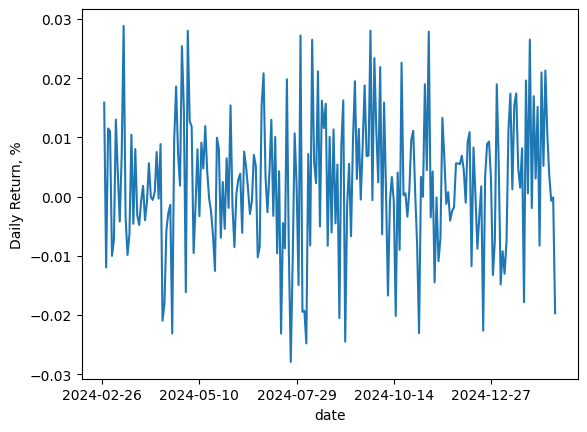

In [41]:
# Plot portfolio returns
portfolio_returns.plot().set_ylabel("Daily Return, %")
plt.show()
# The 'spikiness' of portfolio returns indicates how uncertain and volatile asset returns became.

In [42]:
# Calculate the 30-day rolling window of portfolio returns
returns_windowed = portfolio_returns.rolling(30)

# Compute the annualized volatility series
volatility_series = returns_windowed.std()*len(returns_df)
volatility_series

date
2024-02-26          NaN
2024-02-27          NaN
2024-02-28          NaN
2024-02-29          NaN
2024-03-01          NaN
                ...    
2025-02-18   2.91509780
2025-02-19   2.91449018
2025-02-20   2.81325279
2025-02-21   2.76676132
2025-02-24   2.90673809
Length: 234, dtype: float64

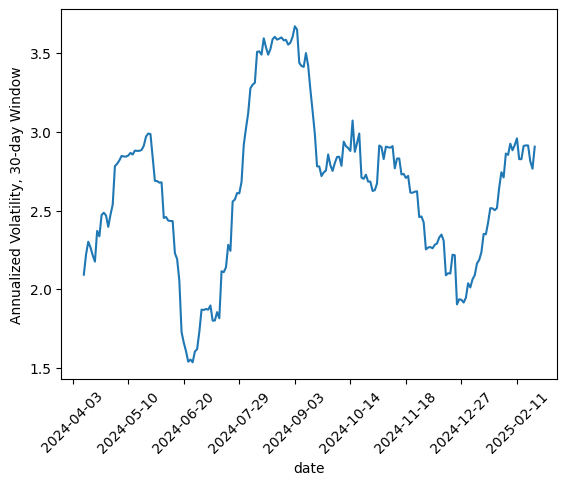

In [43]:
# Plot the portfolio volatility
volatility_series.plot().set_ylabel("Annualized Volatility, 30-day Window")
plt.xticks(rotation=45)
plt.show()

In [44]:
# Compute the annualized average historical return
mean_returns = mean_historical_return(portfolio_df, frequency = len(returns_df))
mean_returns.sort_values(ascending = False)

ticker
APP        6.01613062
SMR        5.81760096
1810.HK    2.96217523
PLTR       2.87122486
VST        1.97175326
SE         1.81644791
SPOT       1.36805542
1211.HK    1.10830013
XPEV       0.97318480
0700.HK    0.75033432
T          0.70872117
BABA       0.70484547
NFLX       0.68583103
TSLA       0.66122221
NVDA       0.65107568
DASH.US    0.63719315
WMT        0.59365262
SAN        0.57111708
META       0.39270229
SO         0.39017656
AAPL       0.37228296
GOOGL      0.30920290
GOLD       0.27798820
VUG        0.22610711
AMZN       0.21839201
VGT        0.20407689
KO         0.19918277
QQQ        0.19886470
SMH        0.16309389
PG         0.09108057
CCJ        0.06130117
HD         0.05456347
JNJ        0.05124054
LIN        0.04330164
MSFT      -0.00112285
ABNB      -0.02993776
NXPI      -0.03195211
VOW3.F    -0.10799309
BIDU      -0.20622737
NIO       -0.22917651
LI        -0.36359117
AMD       -0.38705704
dtype: float64

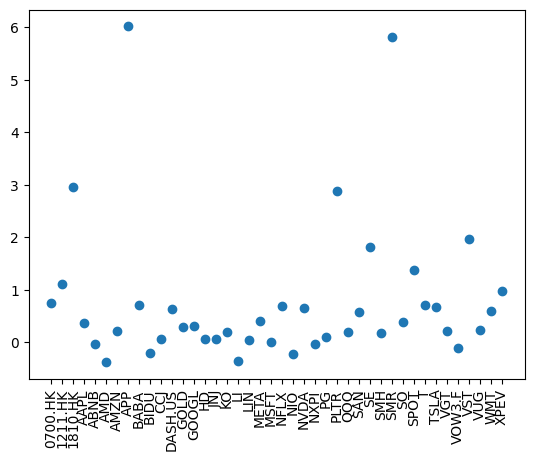

In [45]:
# Plot the annualized average historical return
plt.plot(mean_returns, linestyle = 'None', marker = 'o')
plt.xticks(rotation=90)
plt.show()

In [46]:
# cumulative returns
cumulative_returns = (1 + returns_df).cumprod() -1
cumulative_returns

ticker,0700.HK,1211.HK,1810.HK,AAPL,ABNB,AMD,AMZN,APP,BABA,BIDU,CCJ,DASH.US,GOLD,GOOGL,HD,JNJ,KO,LI,LIN,META,MSFT,NFLX,NIO,NVDA,NXPI,PG,PLTR,QQQ,SAN,SE,SMH,SMR,SO,SPOT,T,TSLA,VGT,VOW3.F,VST,VUG,WMT,XPEV
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-27,-0.00905316,0.05321994,0.02900763,0.00811442,0.01869096,0.01130618,-0.00681051,0.02780132,0.01529206,0.01600506,0.01859502,0.03177913,-0.00955915,0.00952266,0.01065655,0.00118170,-0.00609566,0.11780358,-0.00031462,0.01102253,-0.00014736,0.02385774,0.02300885,-0.00494338,0.00795766,-0.00574244,0.04117148,0.00240523,0.00245173,0.03020282,-0.00289989,0.14285714,0.00317031,-0.00772579,0.01385400,0.00165496,0.00145774,0.00041355,0.04574302,0.00171641,-0.00016810,0.01735358
2024-02-28,-0.03551551,0.02660970,-0.00152672,0.00143532,0.02786896,0.00301119,-0.00898529,-0.01661299,-0.02509395,-0.06582874,-0.00269180,0.02126950,-0.01505146,-0.00865013,0.01617327,0.00472617,-0.00510602,0.09554910,0.01406938,0.00473277,0.00044158,0.01502595,-0.03893805,-0.01806757,0.00077945,-0.00106100,0.03650255,-0.00293222,0.00978139,0.05268959,-0.01397658,0.17216117,0.00845364,-0.01074552,0.02168314,0.01323972,-0.00318738,0.02606224,0.08758865,-0.00115399,0.00033620,-0.05314534
2024-02-29,-0.03481908,0.02873885,0.00916031,-0.00226334,0.05493401,0.09385830,0.01161792,0.01237498,-0.03241374,-0.08373271,-0.00831811,0.03903578,0.00763055,0.00646954,0.02424653,0.00366899,-0.01136634,0.10982100,0.00872040,0.01741595,0.01496765,0.02598485,0.01769912,0.00025292,0.02436505,-0.00798915,0.06451613,0.00561212,0.00487792,0.06966490,0.00760618,0.13553114,0.01509411,0.00556885,0.01987887,0.01243731,0.00635539,0.02129326,0.11876775,0.00624431,-0.01661117,0.02277657
2024-03-01,-0.03412266,0.03618950,0.01679389,-0.00827969,0.07000737,0.15129822,0.01997367,0.05543312,-0.02470246,-0.05940863,0.02691558,0.06289098,0.02687462,-0.00312607,0.03458024,0.00827128,-0.01943786,0.05321722,0.00959692,0.04267864,0.01953185,0.05392666,0.02300885,0.04029572,0.05627790,-0.00855067,0.05814941,0.02075367,0.01465931,0.12544092,0.04844290,0.26373626,0.00920795,0.03435429,0.02288811,0.01624875,0.02501352,-0.03138556,0.11794725,0.01672001,-0.01409479,0.07917570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-18,0.76827735,0.97517098,2.69465649,0.35584215,0.07590273,-0.35071871,0.29714417,7.40820478,0.67275440,-0.18473641,0.17478334,0.76803737,0.28293818,0.34067151,0.11191737,-0.00514853,0.17211106,-0.38001935,0.05971947,0.49114517,0.01080004,0.76269889,-0.22831858,0.76287442,-0.04963247,0.05799363,4.28947368,0.24286964,0.55787108,2.05599647,0.22346384,7.07326007,0.34136895,1.47288129,0.66209755,0.77587763,0.25996790,-0.11243192,2.50744150,0.27146659,0.76214595,0.89587852
2025-02-19,0.74825912,0.98921760,2.77480916,0.35806057,0.05835064,-0.34838930,0.29702970,7.37718257,0.65812275,-0.20399674,0.14119709,0.77863041,0.31228644,0.35161458,0.09019238,0.01346602,0.18942537,-0.35994194,0.05116582,0.46491790,0.02345840,0.77542755,-0.22300885,0.76072457,0.01979925,0.06477277,3.75636672,0.24321528,0.52722444,2.00308642,0.22881190,6.73992674,0.35058315,1.52060865,0.67293593,0.80822467,0.25910719,-0.15101495,2.50889189,0.27179376,0.76588147,0.95119306
2025-02-20,0.70962744,1.02595491,2.75190840,0.36338477,0.04046359,-0.35134367,0.27556802,6.62858112,0.79231218,-0.18934804,0.14095194,0.68696305,0.31508151,0.34643486,0.08801436,0.02495569,0.18891612,-0.36211901,0.05077909,0.44632985,0.02887313,0.74345274,-0.22654867,0.77185319,0.02096199,0.06937747,3.51061121,0.23793844,0.53999387,1.92835097,0.23100842,6.61172161,0.37151032,1.49723519,0.66719796,0.77733200,0.25490142,-0.14468856,2.38105095,0.26531002,0.65058979,0.91973970


In [47]:
# function to calculate how much I would have earned if I had kept these weight and these stocks from the beginning

def hypoth_gains(fix_weights, init_invest=1):
    portfolio_cumulative_returns = (cumulative_returns * fix_weights).sum(axis=1)
    # return round((1 + portfolio_cumulative_returns.iloc[-1]*100)*init_invest, 3)
    return round((1+portfolio_cumulative_returns.iloc[-1])*init_invest,2)

hypoth_gains(ord_weights_norm)

1.71

In [48]:
# calculate efficient frontier

ef = EfficientFrontier(mean_returns, cov_mat)
ef

In [49]:
# Calculate efficient portfolios for a range of target returns
# used to generate 100 efficient portfolios, which are combinations of (returns, volatilities, weights)
target_returns = np.linspace(mean_returns.min(), mean_returns.max()-0.0000001, 100) # target_return must be lower than the maximum possible return
target_returns

array([-3.87057037e-01, -3.22378375e-01, -2.57699713e-01, -1.93021051e-01,
       -1.28342389e-01, -6.36637263e-02,  1.01493588e-03,  6.56935981e-02,
        1.30372260e-01,  1.95050923e-01,  2.59729585e-01,  3.24408247e-01,
        3.89086909e-01,  4.53765571e-01,  5.18444234e-01,  5.83122896e-01,
        6.47801558e-01,  7.12480220e-01,  7.77158882e-01,  8.41837545e-01,
        9.06516207e-01,  9.71194869e-01,  1.03587353e+00,  1.10055219e+00,
        1.16523086e+00,  1.22990952e+00,  1.29458818e+00,  1.35926684e+00,
        1.42394550e+00,  1.48862417e+00,  1.55330283e+00,  1.61798149e+00,
        1.68266015e+00,  1.74733882e+00,  1.81201748e+00,  1.87669614e+00,
        1.94137480e+00,  2.00605346e+00,  2.07073213e+00,  2.13541079e+00,
        2.20008945e+00,  2.26476811e+00,  2.32944678e+00,  2.39412544e+00,
        2.45880410e+00,  2.52348276e+00,  2.58816142e+00,  2.65284009e+00,
        2.71751875e+00,  2.78219741e+00,  2.84687607e+00,  2.91155474e+00,
        2.97623340e+00,  

In [50]:
efficient_portfolios = []
for target_return in target_returns:
    ef.efficient_return(target_return)
    efficient_portfolios.append(ef.portfolio_performance())
len(efficient_portfolios), len(efficient_portfolios[0])

C:\Users\Alienware\miniconda3\lib\site-packages\cvxpy\problems\problem.py:1481: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


(100, 3)

In [51]:
# Extract returns and volatilities (first and second elements of the tuples) from efficient portfolios
frontier_returns = [perf[0] for perf in efficient_portfolios]
frontier_volatilities = [perf[1] for perf in efficient_portfolios]

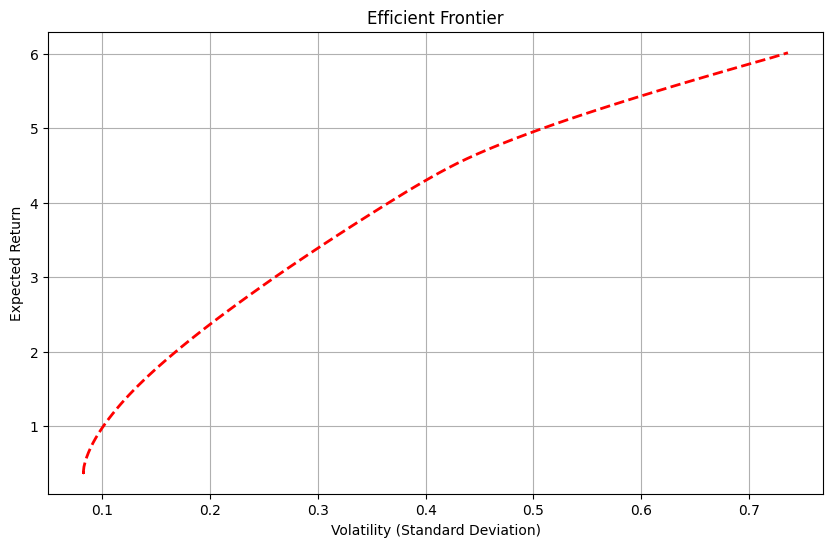

In [52]:
# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(frontier_volatilities, frontier_returns, 'r--', linewidth=2)
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

In [53]:
efficient_portfolios_cla = CLA(mean_returns, cov_mat)
# Compute the efficient frontier
(returns_cla, volatilities_cla, weights_cla) = efficient_portfolios_cla.efficient_frontier()
len(returns_cla), len(volatilities_cla), len(weights_cla)

(59, 59, 59)

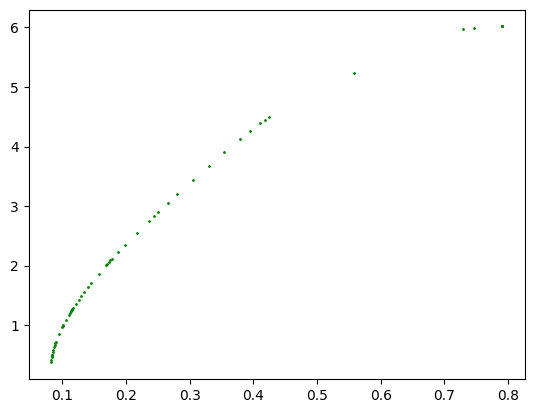

In [54]:
plt.scatter(volatilities_cla, returns_cla, s = 4, c = 'g', marker = '.', label = 'Efficient Frontier using CLA')

In [55]:
np.array(weights_cla).shape

(59, 42, 1)

In [56]:
hypoth_gains_all = []
for weight_cla in weights_cla:
    weight_fin = [w[0] for w in weight_cla]
    hypoth_gains_all.append(hypoth_gains(weight_fin, 100000))

list(zip(np.round(returns_cla, 2), hypoth_gains_all, np.round(volatilities_cla, 2)))

[(6.02, 695795.9, 0.79),
 (6.02, 695795.9, 0.79),
 (6.02, 695795.9, 0.79),
 (6.0, 693935.43, 0.75),
 (5.98, 692074.96, 0.73),
 (5.24, 618839.53, 0.56),
 (4.5, 545604.1, 0.42),
 (4.44, 540216.42, 0.42),
 (4.39, 534828.74, 0.41),
 (4.25, 521603.74, 0.39),
 (4.12, 508378.73, 0.38),
 (3.9, 486609.68, 0.35),
 (3.68, 464840.62, 0.33),
 (3.44, 440915.21, 0.31),
 (3.2, 416989.81, 0.28),
 (3.05, 402563.74, 0.27),
 (2.91, 388137.68, 0.25),
 (2.83, 380710.99, 0.24),
 (2.76, 373284.3, 0.24),
 (2.55, 353195.84, 0.22),
 (2.35, 333107.38, 0.2),
 (2.23, 321587.39, 0.19),
 (2.12, 310067.39, 0.18),
 (2.09, 307040.74, 0.18),
 (2.06, 304014.09, 0.17),
 (2.03, 301715.34, 0.17),
 (2.01, 299416.59, 0.17),
 (1.86, 284659.22, 0.16),
 (1.71, 269901.86, 0.15),
 (1.64, 262501.4, 0.14),
 (1.56, 255100.94, 0.13),
 (1.5, 248525.41, 0.13),
 (1.43, 241949.89, 0.13),
 (1.36, 234876.55, 0.12),
 (1.29, 227803.21, 0.12),
 (1.27, 225963.45, 0.12),
 (1.25, 224123.69, 0.11),
 (1.24, 223183.27, 0.11),
 (1.23, 222242.84, 0.11)